### TP no5 : Ensemble learning

### Déterminons la probatilité que le classsifier aggrégé produisent la bonne baleur


In [3]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

#### Question 1

Pour obtenir une prédiction correcte, il faut que, au moins, la moitié des classificateurs aient une bonne prédiction, dont la probabilité de prédiction correcte, sachant que le modèle agrégé suit une loi binomiale, est : soit $k$ le plus petit entier telque $k>L/2$ dù $k=⌊E(L/2)⌋+1$, où ⌊𝐿/2⌋représente la partie entière de 𝐿/2 plus 1. Ainsi, la probabilité que le modèle agrégé soit correct correspond à $P(X>=k)= \sum_{i=1}^{L}P(X=k)$

In [4]:
p = 0.7
L_values = [1, 5, 10, 50, 100]
probabilities = [1-binom.cdf(L // 2, L, p) for L in L_values]
for L, prob in zip(L_values, probabilities):
    print(f"L = {L}: Probabilité de prédiction correcte = {prob:.4f}")

L = 1: Probabilité de prédiction correcte = 0.7000
L = 5: Probabilité de prédiction correcte = 0.8369
L = 10: Probabilité de prédiction correcte = 0.8497
L = 50: Probabilité de prédiction correcte = 0.9976
L = 100: Probabilité de prédiction correcte = 1.0000


 Tracons les probabilités de la classification correct pour chaque nombre de classifieurs 1,2,...,10

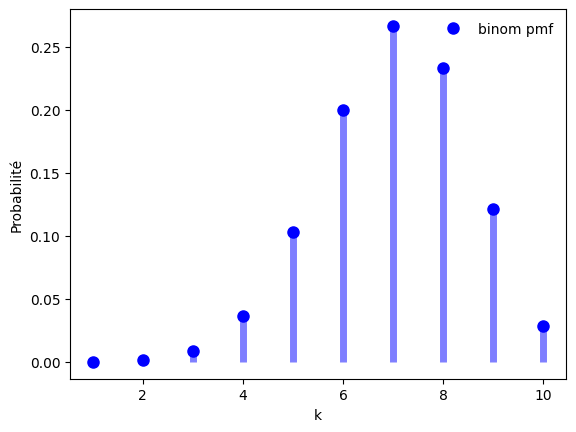

In [9]:
L = 10
rv = binom(L, p)
fig, ax = plt.subplots(1, 1)
x = np.arange(1,11)
ax.plot(x,rv.pmf(x), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, L, p), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('k')
ax.set_ylabel('Probabilité')
ax.legend(loc='best', frameon=False)


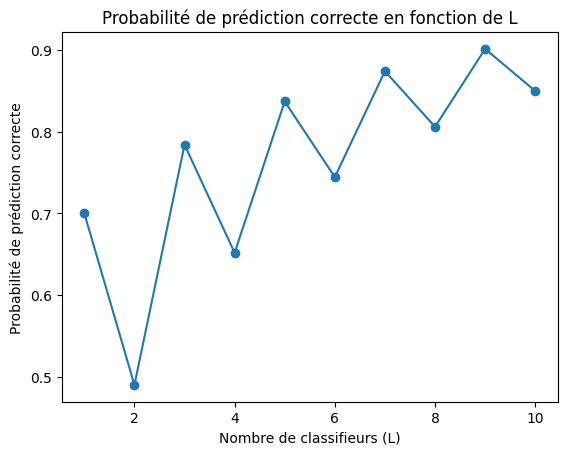

In [6]:
from scipy.stats import binom
import matplotlib.pyplot as plt

p = 0.7
L_values = range(1, 11)
prob_correct = [1 - binom.cdf(L//2, L, p) for L in L_values]

plt.plot(L_values, prob_correct, marker='o')
plt.xlabel('Nombre de classifieurs (L)')
plt.ylabel('Probabilité de prédiction correcte')
plt.title('Probabilité de prédiction correcte en fonction de L')
plt.show()

### Bagging

**Question** 2 : Mettez en œuvre le Bagging avec des arbres de régression de profondeur 1 (stumps), puis avec des arbres plus profonds.

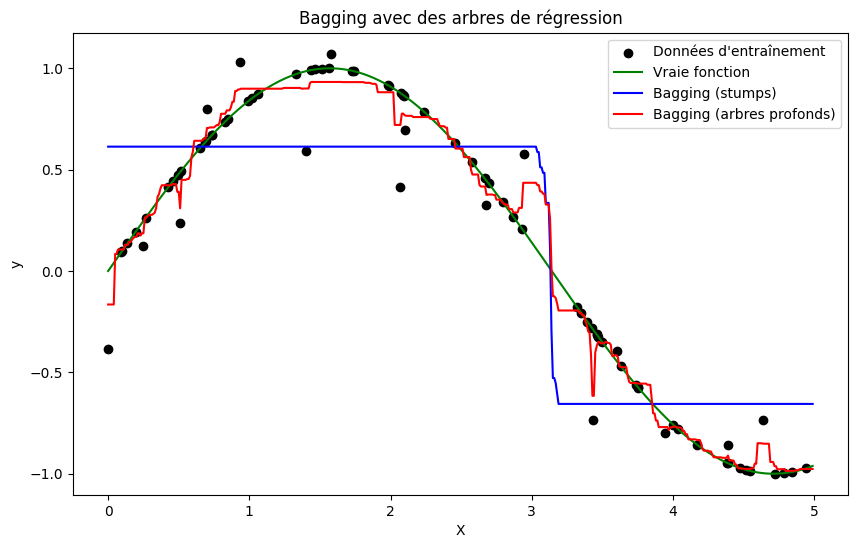

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 *rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 *(0.5 -rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]



stump = DecisionTreeRegressor(max_depth=1, random_state=1)
bagging_stump = BaggingRegressor(stump, n_estimators=50, random_state=1)
bagging_stump.fit(X, y)
y_pred_stump = bagging_stump.predict(X_test)


deep_tree = DecisionTreeRegressor(max_depth=5, random_state=1)
bagging_deep = BaggingRegressor(deep_tree, n_estimators=50, random_state=1)
bagging_deep.fit(X, y)
y_pred_deep = bagging_deep.predict(X_test)



# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c="black", label="Données d'entraînement")
plt.plot(X_test, np.sin(X_test).ravel(), label="Vraie fonction", color="green")
plt.plot(X_test, y_pred_stump, label="Bagging (stumps)", color="blue")
plt.plot(X_test, y_pred_deep, label="Bagging (arbres profonds)", color="red")
plt.title("Bagging avec des arbres de régression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**Question 3** Illustrons graphiquement le rôle de L ainsi que de la profondeur des arbres (max_depth) en jouant
sur ces deux paramètres

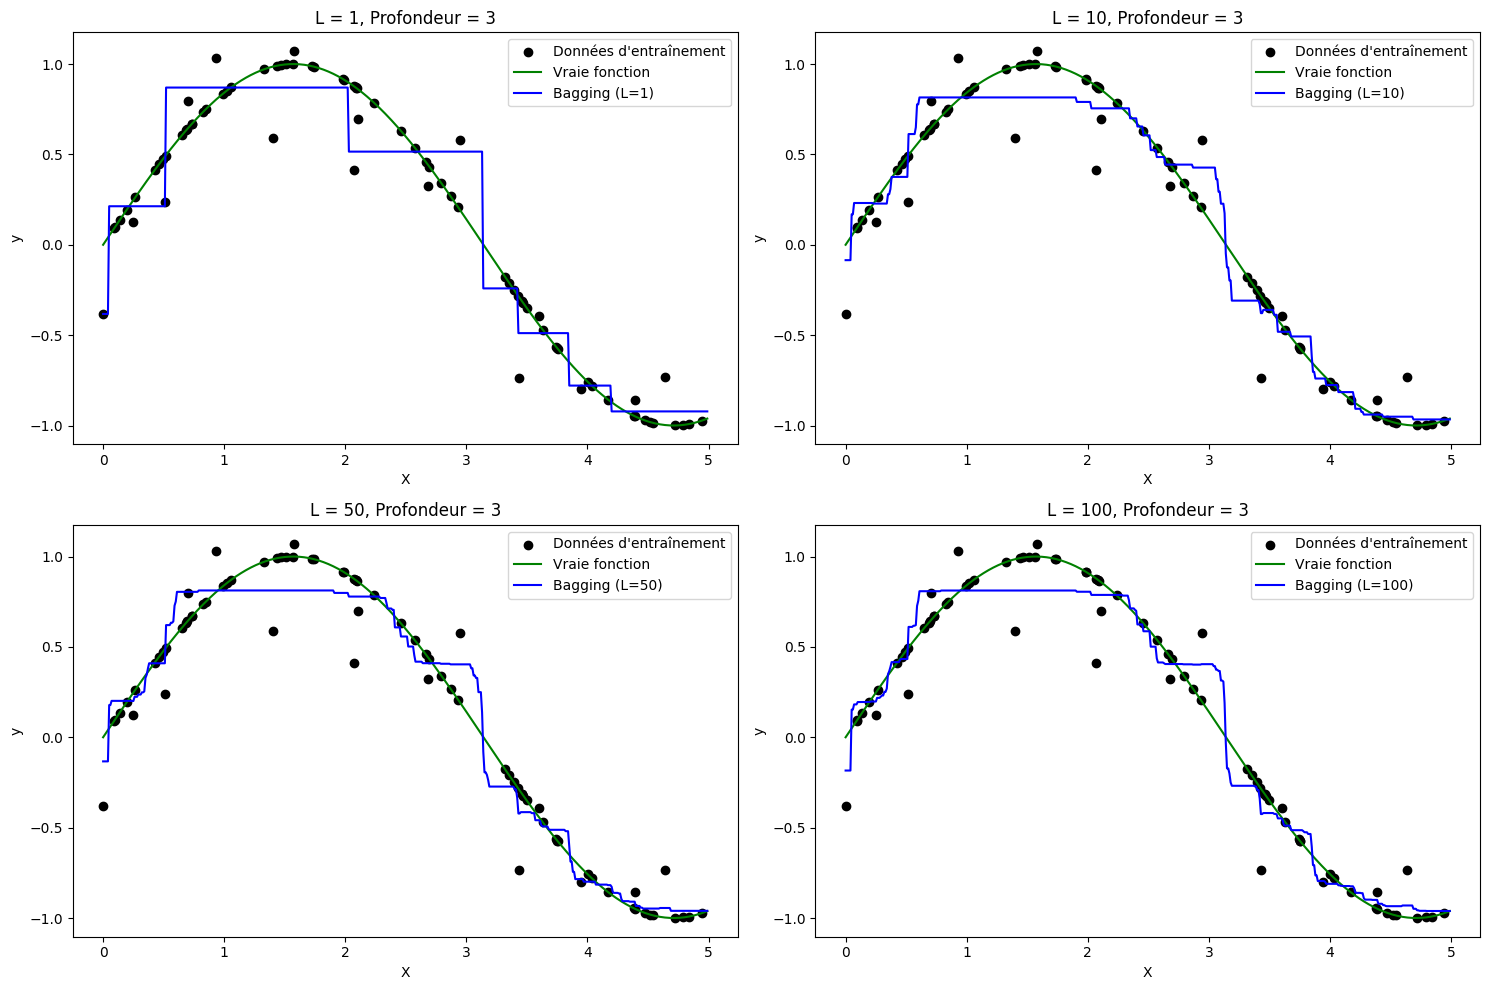

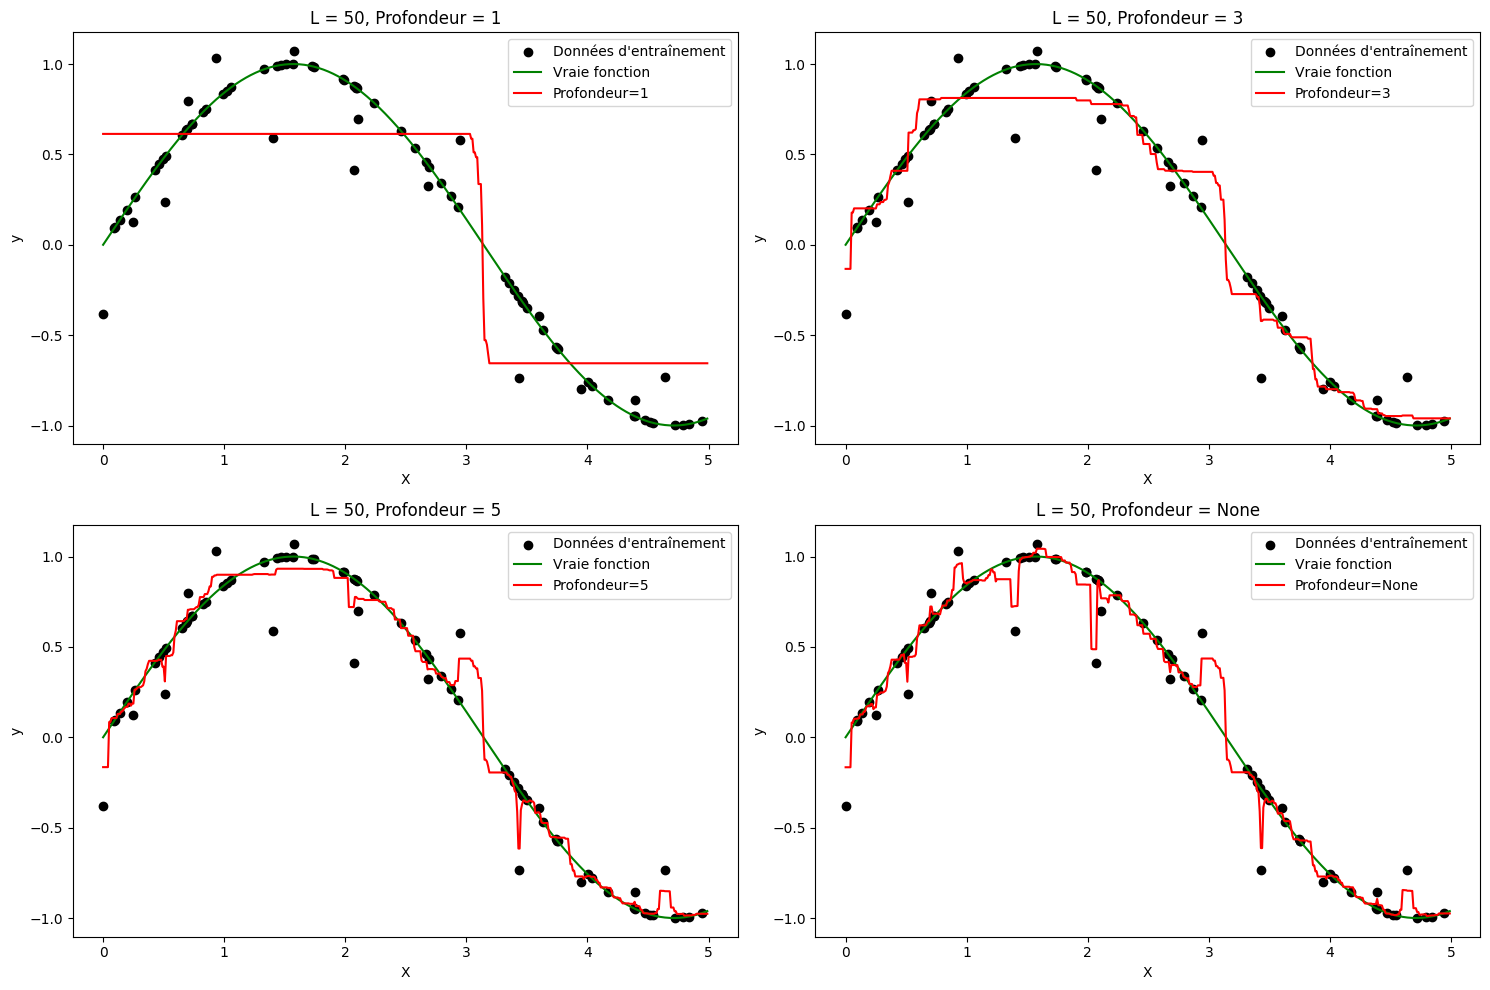

In [43]:
# Variation de L
L_values = [1, 10, 50, 100]
max_depth = 3

plt.figure(figsize=(15, 10))
for i, L in enumerate(L_values, 1):
    bagging = BaggingRegressor(DecisionTreeRegressor(max_depth=max_depth, random_state=1),
        n_estimators=L,
        random_state=1
    )
    bagging.fit(X, y)
    y_pred = bagging.predict(X_test)
    
    plt.subplot(2, 2, i)
    plt.scatter(X, y, c="black", label="Données d'entraînement")
    plt.plot(X_test, np.sin(X_test).ravel(), label="Vraie fonction", color="green")
    plt.plot(X_test, y_pred, label=f"Bagging (L={L})", color="blue")
    plt.title(f"L = {L}, Profondeur = {max_depth}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.tight_layout()
plt.show()


depth_values = [1, 3, 5, None]
L = 50

plt.figure(figsize=(15, 10))
for i, depth in enumerate(depth_values, 1):
    bagging = BaggingRegressor(DecisionTreeRegressor(max_depth=depth, random_state=1),
        n_estimators=L,
        random_state=1
    )
    bagging.fit(X, y)
    y_pred = bagging.predict(X_test)
    
    plt.subplot(2, 2, i)
    plt.scatter(X, y, c="black", label="Données d'entraînement")
    plt.plot(X_test, np.sin(X_test).ravel(), label="Vraie fonction", color="green")
    plt.plot(X_test, y_pred, label=f"Profondeur={depth}", color="red")
    plt.title(f"L = {L}, Profondeur = {depth}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
plt.tight_layout()
plt.show()

### Question 1.4

En comparant les prédictions d'un seul arbre avec celles d'un ensemble d'arbres (bagging). On constatque les arbres de faible profondeur (dans notre figure max_depth=1) sont biaisés car ils ne capturent pas bien les détails de la vraie fonction sin(𝑥). Cela se traduit par des prédictions qui sont lissées
que Les prédictions du bagging seront moins sensibles aux variations des données d'entraînement. Le Bagging réduit la variance en combinant plusieurs modèles. Cela se voit par des prédictions plus stables et proches de la vraie fonction.

Les arbres de décision ont tendance à avoir une variance élevée et un faible biais, surtout lorsqu'ils sont profonds. Le bagging réduit la variance en moyennant les prédictions de plusieurs arbres, ce qui stabilise le modèle.



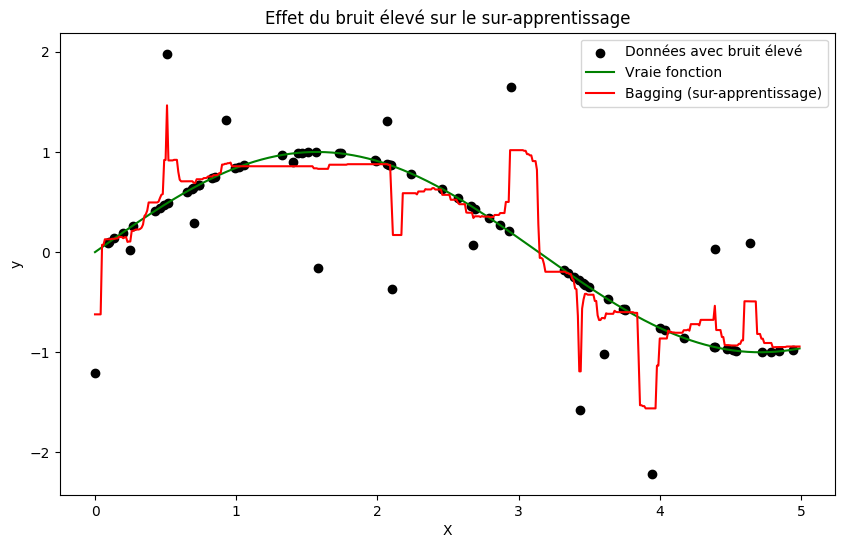

In [12]:
y_high_noise = np.sin(X).ravel()
y_high_noise[::5] += 3 * (0.5 - rng.rand(16)) # Le bruit est passé de 1 à 3

bagging_high_noise = BaggingRegressor(DecisionTreeRegressor(max_depth=5, random_state=1),
    n_estimators=50,
    random_state=1
)
bagging_high_noise.fit(X, y_high_noise)
y_pred_high_noise = bagging_high_noise.predict(X_test)
# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(X, y_high_noise, c="black", label="Données avec bruit élevé")
plt.plot(X_test, np.sin(X_test).ravel(), label="Vraie fonction", color="green")
plt.plot(X_test, y_pred_high_noise, label="Bagging (sur-apprentissage)", color="red")
plt.title("Effet du bruit élevé sur le sur-apprentissage")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

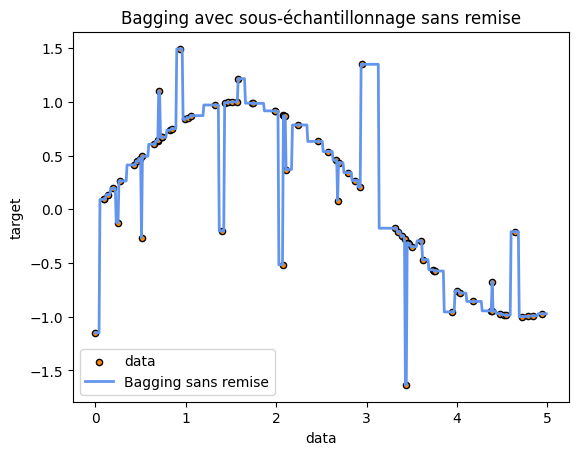

In [16]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Créer un jeu de données aléatoire
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))  # Ajouter du bruit

# Bagging avec sous-échantillonnage sans remise
base_estimator = DecisionTreeRegressor(max_depth=10)
bagging = BaggingRegressor(
    base_estimator,
    n_estimators=50,
    bootstrap=False,  # Désactiver le bootstrap (sous-échantillonnage sans remise)
    random_state=1
)
bagging.fit(X, y)

# Prédictions
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = bagging.predict(X_test)

# Tracer les résultats
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Bagging sans remise", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Bagging avec sous-échantillonnage sans remise")
plt.legend()
plt.show()

### 3. Random Forest

**Question 7** : Évaluez le score par 7-fold cross-validation des Random Forests sur les datasets boston, diabetes, iris et digits. Comparez les performances avec celles d'un SVM linéaire.

In [19]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC  # On importe SVR au lieu de LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_diabetes, load_iris, load_digits

# Charger les datasets
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Random Forest
rf_regressor = RandomForestRegressor(random_state=1)
rf_classifier = RandomForestClassifier(random_state=1)

# SVM
svm_regressor = SVR(kernel='linear')  # SVR pour la régression
svm_classifier = SVC(kernel='linear')  # SVC pour la classification

# Évaluation par cross-validation
datasets = [diabetes, iris, digits]
# On associe le bon type de modèle à chaque dataset
models = [rf_regressor, rf_classifier, rf_classifier]  # diabetes est régression, iris et digits sont classification
svm_models = [svm_regressor, svm_classifier, svm_classifier]  # pareil pour SVM

for i, dataset in enumerate(datasets):
    X, y = dataset.data, dataset.target
    rf_score = cross_val_score(models[i], X, y, cv=7).mean()
    svm_score = cross_val_score(svm_models[i], X, y, cv=7).mean()
    print(f"Dataset: {dataset.__class__.__name__}, RF Score: {rf_score}, SVM Score: {svm_score}")

Dataset: Bunch, RF Score: 0.4037127878132223, SVM Score: -0.028076491361505935
Dataset: Bunch, RF Score: 0.953308596165739, SVM Score: 0.9734075448361164
Dataset: Bunch, RF Score: 0.9348791863535297, SVM Score: 0.9499157518065592


In [21]:
from sklearn.datasets import load_diabetes, load_iris, load_digits
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_score
import numpy as np

# Chargement des datasets
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Fonction pour évaluer les modèles
def evaluate_model(model, X, y, cv=7):
    scores = cross_val_score(model, X, y, cv=cv)
    return np.mean(scores), np.std(scores)

# Évaluation des Random Forests
rf_regressor = RandomForestRegressor()
rf_classifier = RandomForestClassifier()

diabetes_rf_score = evaluate_model(rf_regressor, diabetes.data, diabetes.target)
iris_rf_score = evaluate_model(rf_classifier, iris.data, iris.target)
digits_rf_score = evaluate_model(rf_classifier, digits.data, digits.target)

# Évaluation des SVM linéaires
svm_regressor = SVR(kernel='linear')
svm_classifier = SVC(kernel='linear')

diabetes_svm_score = evaluate_model(svm_regressor, diabetes.data, diabetes.target)
iris_svm_score = evaluate_model(svm_classifier, iris.data, iris.target)
digits_svm_score = evaluate_model(svm_classifier, digits.data, digits.target)


print(f"Diabetes - Random Forest: {diabetes_rf_score}")
print(f"Diabetes - SVM: {diabetes_svm_score}")
print(f"Iris - Random Forest: {iris_rf_score}")
print(f"Iris - SVM: {iris_svm_score}")
print(f"Digits - Random Forest: {digits_rf_score}")
print(f"Digits - SVM: {digits_svm_score}")


Diabetes - Random Forest: (np.float64(0.4117761513793898), np.float64(0.07350529631437829))
Diabetes - SVM: (np.float64(-0.028076491361505935), np.float64(0.0825129723848823))
Iris - Random Forest: (np.float64(0.9533085961657389), np.float64(0.05034978384086054))
Iris - SVM: (np.float64(0.9734075448361164), np.float64(0.02304426825465271))
Digits - Random Forest: (np.float64(0.9343276646748194), np.float64(0.025373218167036686))
Digits - SVM: (np.float64(0.9499157518065592), np.float64(0.012050625827748697))


8) Affichage de la probabilité de prédiction des classes sur le dataset iris restreint aux deux premières variables explicatives

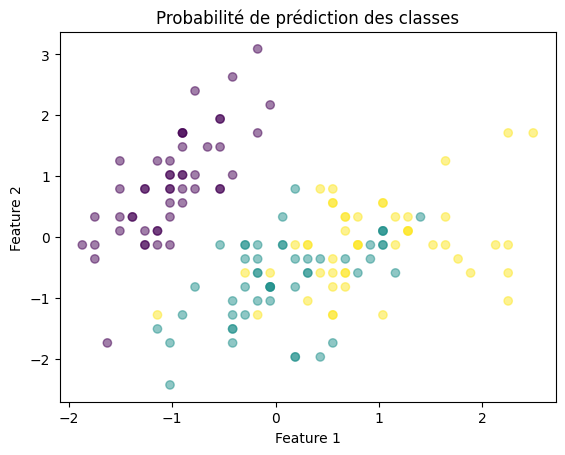

In [23]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# Chargement des données
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target

# Standardisation des données
X = scale(X_unscaled)

# Entraînement du modèle
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Prédiction des probabilités
proba = rf_classifier.predict_proba(X)

# Affichage des probabilités
plt.scatter(X[:, 0], X[:, 1], c=proba.argmax(axis=1), cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Probabilité de prédiction des classes')
plt.show()


9) Comparaison des scores par 6-fold cross-validation des Random Forests et des arbres de décisions pures sur le dataset digits

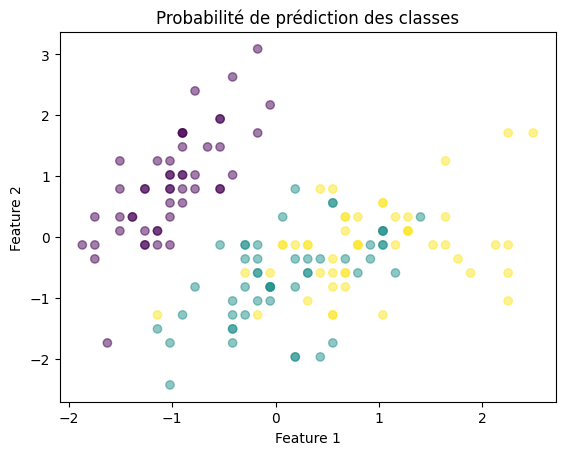

In [22]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# Chargement des données
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target

# Standardisation des données
X = scale(X_unscaled)

# Entraînement du modèle
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Prédiction des probabilités
proba = rf_classifier.predict_proba(X)

# Affichage des probabilités
plt.scatter(X[:, 0], X[:, 1], c=proba.argmax(axis=1), cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Probabilité de prédiction des classes')
plt.show()


### 3 Boosting

### 10) Démonstration de la propriété du minimiseur de la fonction

Nous devons démontrer que le minimiseur de la fonction 

$$
R_{\text{exp}}(f) = \mathbb{E}\left[\exp(-Yf(X))\right]
$$

est atteint en 

$$
f_{\text{exp}}^* = \frac{1}{2} \log\left(\frac{\eta(x)}{1 - \eta(x)}\right).
$$

Pour cela, nous devons minimiser l'espérance de la fonction exponentielle de la perte. La fonction de perte exponentielle est donnée par :

$$
R_{\text{exp}}(f) = \mathbb{E}\left[\exp(-Yf(X))\right].
$$

En utilisant la définition de l'espérance conditionnelle, nous avons :

$$
R_{\text{exp}}(f) = \mathbb{E}\left[\mathbb{E}\left[\exp(-Yf(X)) \mid X\right]\right].
$$

En utilisant la loi de probabilité totale, nous obtenons :

$$
\mathbb{E}\left[\exp(-Yf(X)) \mid X\right] = \eta(X) \exp(-f(X)) + (1 - \eta(X)) \exp(f(X)).
$$

Nous devons minimiser cette expression par rapport à \( f(X) \). Pour cela, nous prenons la dérivée par rapport à \( f(X) \) et nous la mettons à zéro :

$$
\frac{\partial}{\partial f(X)}\left(\eta(X) \exp(-f(X)) + (1 - \eta(X)) \exp(f(X))\right) = 0.
$$

Cela donne :

$$
-\eta(X) \exp(-f(X)) + (1 - \eta(X)) \exp(f(X)) = 0.
$$

En résolvant cette équation, nous obtenons :

$$
\eta(X) \exp(-f(X)) = (1 - \eta(X)) \exp(f(X)).
$$

Nous pouvons réarranger cette équation pour obtenir :

$$
\frac{\eta(X)}{1 - \eta(X)} = \exp(2f(X)).
$$

En prenant le logarithme des deux côtés, nous obtenons :

$$
f(X) = \frac{1}{2} \log\left(\frac{\eta(X)}{1 - \eta(X)}\right).
$$

Ainsi, le minimiseur de la fonction \( R_{\text{exp}}(f) \) est atteint en 

$$
f_{\text{exp}}^* = \frac{1}{2} \log\left(\frac{\eta(x)}{1 - \eta(x)}\right).
$$

### 11) Classifieur de Bayes associé au risque \( R_{\text{exp}} \)

Nous devons montrer que le classifieur de Bayes associé au risque 

$$
R_{\text{exp}}
$$

est le même que celui associé au risque 0/1, 

$$
R_{\varphi_0}.
$$

Le classifieur de Bayes pour le risque 0/1 est donné par :

$$
h_{\varphi_0}^* = \text{sign}(2\eta(x) - 1).
$$

Pour le risque exponentiel, nous avons trouvé que le minimiseur est :

$$
f_{\text{exp}}^* = \frac{1}{2} \log\left(\frac{\eta(x)}{1 - \eta(x)}\right).
$$

Le classifieur associé est donc :

$$
h_{\text{exp}}^* = \text{sign}(f_{\text{exp}}^*(x)) = \text{sign}\left(\frac{1}{2} \log\left(\frac{\eta(x)}{1 - \eta(x)}\right)\right).
$$

Puisque 

$$
\log\left(\frac{\eta(x)}{1 - \eta(x)}\right)
$$ 

est positif si et seulement si \( \eta(x) > 0.5 \), nous avons :

$$
h_{\text{exp}}^* = \text{sign}(2\eta(x) - 1).
$$

Ainsi, le classifieur de Bayes associé au risque \( R_{\text{exp}} \) est le même que celui associé au risque 0/1, \( R_{\varphi_0} \).